In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
# подготовка к расчету tsy

In [3]:
df = pd.read_csv('new_union.txt', sep = ';', names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i'], index_col = None)

In [4]:
df.head()

,a,b,c,d,e,f,g,h,i
A US Equity,"5501,4585",01.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.14,NaN
A US Equity,"5716,1668",02.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.08,NaN
A US Equity,"5909,7562",05.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.11,NaN
A US Equity,"6381,4103",06.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.09,NaN
A US Equity,"6416,6084",07.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.11,NaN


In [5]:
df = df.reset_index()

In [6]:
df.head()

,index,a,b,c,d,e,f,g,h,i
0,A US Equity,"5501,4585",01.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.14,NaN
1,A US Equity,"5716,1668",02.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.08,NaN
2,A US Equity,"5909,7562",05.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.11,NaN
3,A US Equity,"6381,4103",06.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.09,NaN
4,A US Equity,"6416,6084",07.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.11,NaN


In [7]:
list(df)

['index', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

In [8]:
df.dtypes

index     object
a         object
b         object
c        float64
d        float64
e        float64
f        float64
g        float64
h        float64
i        float64
dtype: object

In [9]:
df.drop(['i'], axis = 1, inplace=True)

In [10]:
df.head()

,index,a,b,c,d,e,f,g,h
0,A US Equity,"5501,4585",01.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.14
1,A US Equity,"5716,1668",02.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.08
2,A US Equity,"5909,7562",05.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.11
3,A US Equity,"6381,4103",06.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.09
4,A US Equity,"6416,6084",07.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.11


In [11]:
df.rename(columns={'index': 'ticker', 'a': 'mcap', 'b': 'date', 'c': 'IS_OPER_INC', 'd': 'BS_TOT_ASSET', 'e': 'BS_CASH_NEAR_CASH_ITEM', 'f': 'BS_MKT_SEC_OTHER_ST_INVEST', 'g': 'SHORT_AND_LONG_TERM_DEBT', 'h': 'FED_Effective'}, inplace=True)

In [12]:
df.head()

,ticker,mcap,date,IS_OPER_INC,BS_TOT_ASSET,BS_CASH_NEAR_CASH_ITEM,BS_MKT_SEC_OTHER_ST_INVEST,SHORT_AND_LONG_TERM_DEBT,FED_Effective
0,A US Equity,"5501,4585",01.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.14
1,A US Equity,"5716,1668",02.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.08
2,A US Equity,"5909,7562",05.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.11
3,A US Equity,"6381,4103",06.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.09
4,A US Equity,"6416,6084",07.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.11


In [13]:
df.rename(columns={'IS_OPER_INC': 'oper_inc', 'BS_TOT_ASSET': 'tot_assets', 'BS_CASH_NEAR_CASH_ITEM': 'cash', 'BS_MKT_SEC_OTHER_ST_INVEST': 'mkt_sec', 'SHORT_AND_LONG_TERM_DEBT': 'debt', 'FED_Effective': 'fed'}, inplace=True)

In [14]:
df.head()

,ticker,mcap,date,oper_inc,tot_assets,cash,mkt_sec,debt,fed
0,A US Equity,"5501,4585",01.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.14
1,A US Equity,"5716,1668",02.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.08
2,A US Equity,"5909,7562",05.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.11
3,A US Equity,"6381,4103",06.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.09
4,A US Equity,"6416,6084",07.01.2009,47.0,7612.0,2479.0,14.0,2905.0,0.11


In [15]:
df.dtypes

ticker         object
mcap           object
date           object
oper_inc      float64
tot_assets    float64
cash          float64
mkt_sec       float64
debt          float64
fed           float64
dtype: object

In [16]:
df['mcap'] = pd.to_numeric(df['mcap'].str.replace(',', '.'))

In [17]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [18]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [19]:
df.dtypes

ticker                object
mcap                 float64
date          datetime64[ns]
oper_inc             float64
tot_assets           float64
cash                 float64
mkt_sec              float64
debt                 float64
fed                  float64
year                   int64
dtype: object

In [20]:
df.head()

,ticker,mcap,date,oper_inc,tot_assets,cash,mkt_sec,debt,fed,year
0,A US Equity,5501.4585,2009-01-01,47.0,7612.0,2479.0,14.0,2905.0,0.14,2009
1,A US Equity,5716.1668,2009-01-02,47.0,7612.0,2479.0,14.0,2905.0,0.08,2009
2,A US Equity,5909.7562,2009-01-05,47.0,7612.0,2479.0,14.0,2905.0,0.11,2009
3,A US Equity,6381.4103,2009-01-06,47.0,7612.0,2479.0,14.0,2905.0,0.09,2009
4,A US Equity,6416.6084,2009-01-07,47.0,7612.0,2479.0,14.0,2905.0,0.11,2009


In [21]:
# теперь все колонки в норм форматах, можно работать

In [22]:
df1 = df.copy()

In [23]:
df1.head()

,ticker,mcap,date,oper_inc,tot_assets,cash,mkt_sec,debt,fed,year
0,A US Equity,5501.4585,2009-01-01,47.0,7612.0,2479.0,14.0,2905.0,0.14,2009
1,A US Equity,5716.1668,2009-01-02,47.0,7612.0,2479.0,14.0,2905.0,0.08,2009
2,A US Equity,5909.7562,2009-01-05,47.0,7612.0,2479.0,14.0,2905.0,0.11,2009
3,A US Equity,6381.4103,2009-01-06,47.0,7612.0,2479.0,14.0,2905.0,0.09,2009
4,A US Equity,6416.6084,2009-01-07,47.0,7612.0,2479.0,14.0,2905.0,0.11,2009


In [24]:
df1['cash_'] = df1['cash'] + df1['mkt_sec']

In [25]:
df1.head()

,ticker,mcap,date,oper_inc,tot_assets,cash,mkt_sec,debt,fed,year,cash_
0,A US Equity,5501.4585,2009-01-01,47.0,7612.0,2479.0,14.0,2905.0,0.14,2009,2493.0
1,A US Equity,5716.1668,2009-01-02,47.0,7612.0,2479.0,14.0,2905.0,0.08,2009,2493.0
2,A US Equity,5909.7562,2009-01-05,47.0,7612.0,2479.0,14.0,2905.0,0.11,2009,2493.0
3,A US Equity,6381.4103,2009-01-06,47.0,7612.0,2479.0,14.0,2905.0,0.09,2009,2493.0
4,A US Equity,6416.6084,2009-01-07,47.0,7612.0,2479.0,14.0,2905.0,0.11,2009,2493.0


In [26]:
df1.drop(['cash', 'mkt_sec'], axis = 1, inplace=True)

In [27]:
df1.head()

,ticker,mcap,date,oper_inc,tot_assets,debt,fed,year,cash_
0,A US Equity,5501.4585,2009-01-01,47.0,7612.0,2905.0,0.14,2009,2493.0
1,A US Equity,5716.1668,2009-01-02,47.0,7612.0,2905.0,0.08,2009,2493.0
2,A US Equity,5909.7562,2009-01-05,47.0,7612.0,2905.0,0.11,2009,2493.0
3,A US Equity,6381.4103,2009-01-06,47.0,7612.0,2905.0,0.09,2009,2493.0
4,A US Equity,6416.6084,2009-01-07,47.0,7612.0,2905.0,0.11,2009,2493.0


In [28]:
growth_rate = 0.02
credit_adj = 1.25
tax = 0.21
non_cash = 0.5
inv_hor = 10

In [29]:
df1['calc'] = df1.oper_inc - (df1.debt - df1.cash_)* df1.fed * credit_adj

In [30]:
df1.head()

,ticker,mcap,date,oper_inc,tot_assets,debt,fed,year,cash_,calc
0,A US Equity,5501.4585,2009-01-01,47.0,7612.0,2905.0,0.14,2009,2493.0,-25.10
1,A US Equity,5716.1668,2009-01-02,47.0,7612.0,2905.0,0.08,2009,2493.0,5.80
2,A US Equity,5909.7562,2009-01-05,47.0,7612.0,2905.0,0.11,2009,2493.0,-9.65
3,A US Equity,6381.4103,2009-01-06,47.0,7612.0,2905.0,0.09,2009,2493.0,0.65
4,A US Equity,6416.6084,2009-01-07,47.0,7612.0,2905.0,0.11,2009,2493.0,-9.65


In [31]:
# df1['compounder1'] = df1.calc*(1 + growth_rate)**1 + df1.calc*(1 + growth_rate)**2 + df1.calc*(1 + growth_rate)**3 + df1.calc*(1 + growth_rate)**4 + df1.calc*(1 + growth_rate)**5 + df1.calc*(1 + growth_rate)**6 + df1.calc*(1 + growth_rate)**7 + df1.calc*(1 + growth_rate)**8 + df1.calc*(1 + growth_rate)**9 + df1.calc*(1 + growth_rate)**10

In [32]:
df1['compounder2'] = 0

In [33]:
for i in range(1, inv_hor+1):
    df1['compounder2'] += (df1.calc*(1 + growth_rate)**i)

In [34]:
df1.head()

,ticker,mcap,date,oper_inc,tot_assets,debt,fed,year,cash_,calc,compounder2
0,A US Equity,5501.4585,2009-01-01,47.0,7612.0,2905.0,0.14,2009,2493.0,-25.10,-280.334757
1,A US Equity,5716.1668,2009-01-02,47.0,7612.0,2905.0,0.08,2009,2493.0,5.80,64.778549
2,A US Equity,5909.7562,2009-01-05,47.0,7612.0,2905.0,0.11,2009,2493.0,-9.65,-107.778104
3,A US Equity,6381.4103,2009-01-06,47.0,7612.0,2905.0,0.09,2009,2493.0,0.65,7.259665
4,A US Equity,6416.6084,2009-01-07,47.0,7612.0,2905.0,0.11,2009,2493.0,-9.65,-107.778104


In [35]:
df1['1-tax'] = 1 - tax
df1['comp_tax'] = df1.compounder2 * df1['1-tax']
df1.head()

,ticker,mcap,date,oper_inc,tot_assets,debt,fed,year,cash_,calc,compounder2,1-tax,comp_tax
0,A US Equity,5501.4585,2009-01-01,47.0,7612.0,2905.0,0.14,2009,2493.0,-25.10,-280.334757,0.79,-221.464458
1,A US Equity,5716.1668,2009-01-02,47.0,7612.0,2905.0,0.08,2009,2493.0,5.80,64.778549,0.79,51.175054
2,A US Equity,5909.7562,2009-01-05,47.0,7612.0,2905.0,0.11,2009,2493.0,-9.65,-107.778104,0.79,-85.144702
3,A US Equity,6381.4103,2009-01-06,47.0,7612.0,2905.0,0.09,2009,2493.0,0.65,7.259665,0.79,5.735135
4,A US Equity,6416.6084,2009-01-07,47.0,7612.0,2905.0,0.11,2009,2493.0,-9.65,-107.778104,0.79,-85.144702


In [36]:
df1['nav'] = ((df1.tot_assets - df1.cash_) * (1 - non_cash) + df1.cash_ - df1.debt) * ((1 + growth_rate)**inv_hor)

In [37]:
# исправила формулу

In [38]:
df1

,ticker,mcap,date,oper_inc,tot_assets,debt,fed,year,cash_,calc,compounder2,1-tax,comp_tax,nav
0,A US Equity,5501.4585,2009-01-01,47.0000,7612.0000,2905.0000,0.14,2009,2493.0000,-25.100000,-280.334757,0.79,-221.464458,2617.790517
1,A US Equity,5716.1668,2009-01-02,47.0000,7612.0000,2905.0000,0.08,2009,2493.0000,5.800000,64.778549,0.79,51.175054,2617.790517
2,A US Equity,5909.7562,2009-01-05,47.0000,7612.0000,2905.0000,0.11,2009,2493.0000,-9.650000,-107.778104,0.79,-85.144702,2617.790517
3,A US Equity,6381.4103,2009-01-06,47.0000,7612.0000,2905.0000,0.09,2009,2493.0000,0.650000,7.259665,0.79,5.735135,2617.790517
4,A US Equity,6416.6084,2009-01-07,47.0000,7612.0000,2905.0000,0.11,2009,2493.0000,-9.650000,-107.778104,0.79,-85.144702,2617.790517
5,A US Equity,6458.8461,2009-01-08,47.0000,7612.0000,2905.0000,0.10,2009,2493.0000,-4.500000,-50.259219,0.79,-39.704783,2617.790517
6,A US Equity,6518.6828,2009-01-09,47.0000,7612.0000,2905.0000,0.09,2009,2493.0000,0.650000,7.259665,0.79,5.735135,2617.790517
7,A US Equity,6518.6828,2009-01-12,47.0000,7612.0000,2905.0000,0.10,2009,2493.0000,-4.500000,-50.259219,0.79,-39.704783,2617.790517
8,A US Equity,6708.7524,2009-01-13,47.0000,7612.0000,2905.0000,0.10,2009,2493.0000,-4.500000,-50.259219,0.79,-39.704783,2617.790517
9,A US Equity,6494.0442,2009-01-14,47.0000,7612.0000,2905.0000,0.15,2009,2493.0000,-30.250000,-337.853641,0.79,-266.904377,2617.790517


In [39]:
df1['tsy'] = ((df1.comp_tax + df1.nav) / df1.mcap) ** (1/inv_hor) - 1

In [40]:
df1

,ticker,mcap,date,oper_inc,tot_assets,debt,fed,year,cash_,calc,compounder2,1-tax,comp_tax,nav,tsy
0,A US Equity,5501.4585,2009-01-01,47.0000,7612.0000,2905.0000,0.14,2009,2493.0000,-25.100000,-280.334757,0.79,-221.464458,2617.790517,-0.079748
1,A US Equity,5716.1668,2009-01-02,47.0000,7612.0000,2905.0000,0.08,2009,2493.0000,5.800000,64.778549,0.79,51.175054,2617.790517,-0.073333
2,A US Equity,5909.7562,2009-01-05,47.0000,7612.0000,2905.0000,0.11,2009,2493.0000,-9.650000,-107.778104,0.79,-85.144702,2617.790517,-0.081243
3,A US Equity,6381.4103,2009-01-06,47.0000,7612.0000,2905.0000,0.09,2009,2493.0000,0.650000,7.259665,0.79,5.735135,2617.790517,-0.085051
4,A US Equity,6416.6084,2009-01-07,47.0000,7612.0000,2905.0000,0.11,2009,2493.0000,-9.650000,-107.778104,0.79,-85.144702,2617.790517,-0.088772
5,A US Equity,6458.8461,2009-01-08,47.0000,7612.0000,2905.0000,0.10,2009,2493.0000,-4.500000,-50.259219,0.79,-39.704783,2617.790517,-0.087749
6,A US Equity,6518.6828,2009-01-09,47.0000,7612.0000,2905.0000,0.09,2009,2493.0000,0.650000,7.259665,0.79,5.735135,2617.790517,-0.086996
7,A US Equity,6518.6828,2009-01-12,47.0000,7612.0000,2905.0000,0.10,2009,2493.0000,-4.500000,-50.259219,0.79,-39.704783,2617.790517,-0.088590
8,A US Equity,6708.7524,2009-01-13,47.0000,7612.0000,2905.0000,0.10,2009,2493.0000,-4.500000,-50.259219,0.79,-39.704783,2617.790517,-0.091206
9,A US Equity,6494.0442,2009-01-14,47.0000,7612.0000,2905.0000,0.15,2009,2493.0000,-30.250000,-337.853641,0.79,-266.904377,2617.790517,-0.096618


In [41]:
df1['year'].unique()

array([2009, 2010, 2011, 2016, 2017, 2018, 2012, 2013, 2014, 2015],
      dtype=int64)

In [42]:
df2 = df1.copy()

In [43]:
df2 = df2[['date', 'year', 'ticker', 'mcap', 'nav', 'tsy']]

In [44]:
# готовый датасет, tsy посчитан

In [45]:
df2

,date,year,ticker,mcap,nav,tsy
0,2009-01-01,2009,A US Equity,5501.4585,2617.790517,-0.079748
1,2009-01-02,2009,A US Equity,5716.1668,2617.790517,-0.073333
2,2009-01-05,2009,A US Equity,5909.7562,2617.790517,-0.081243
3,2009-01-06,2009,A US Equity,6381.4103,2617.790517,-0.085051
4,2009-01-07,2009,A US Equity,6416.6084,2617.790517,-0.088772
5,2009-01-08,2009,A US Equity,6458.8461,2617.790517,-0.087749
6,2009-01-09,2009,A US Equity,6518.6828,2617.790517,-0.086996
7,2009-01-12,2009,A US Equity,6518.6828,2617.790517,-0.088590
8,2009-01-13,2009,A US Equity,6708.7524,2617.790517,-0.091206
9,2009-01-14,2009,A US Equity,6494.0442,2617.790517,-0.096618


In [46]:
df3 = df2.copy()

In [47]:
# удалим из df3 все, что NaN 

In [48]:
df3 = df3.dropna()

In [49]:
df3

,date,year,ticker,mcap,nav,tsy
0,2009-01-01,2009,A US Equity,5501.4585,2617.790517,-0.079748
1,2009-01-02,2009,A US Equity,5716.1668,2617.790517,-0.073333
2,2009-01-05,2009,A US Equity,5909.7562,2617.790517,-0.081243
3,2009-01-06,2009,A US Equity,6381.4103,2617.790517,-0.085051
4,2009-01-07,2009,A US Equity,6416.6084,2617.790517,-0.088772
5,2009-01-08,2009,A US Equity,6458.8461,2617.790517,-0.087749
6,2009-01-09,2009,A US Equity,6518.6828,2617.790517,-0.086996
7,2009-01-12,2009,A US Equity,6518.6828,2617.790517,-0.088590
8,2009-01-13,2009,A US Equity,6708.7524,2617.790517,-0.091206
9,2009-01-14,2009,A US Equity,6494.0442,2617.790517,-0.096618


In [50]:
# перевести в проценты tsy

In [51]:
df3['tsy'] = df3['tsy']*100

In [52]:
df3.head()

,date,year,ticker,mcap,nav,tsy
0,2009-01-01,2009,A US Equity,5501.4585,2617.790517,-7.974792
1,2009-01-02,2009,A US Equity,5716.1668,2617.790517,-7.333276
2,2009-01-05,2009,A US Equity,5909.7562,2617.790517,-8.124336
3,2009-01-06,2009,A US Equity,6381.4103,2617.790517,-8.505105
4,2009-01-07,2009,A US Equity,6416.6084,2617.790517,-8.877234


In [53]:
df3 = df3.round({'tsy':2})

In [54]:
df3.head()

,date,year,ticker,mcap,nav,tsy
0,2009-01-01,2009,A US Equity,5501.4585,2617.790517,-7.97
1,2009-01-02,2009,A US Equity,5716.1668,2617.790517,-7.33
2,2009-01-05,2009,A US Equity,5909.7562,2617.790517,-8.12
3,2009-01-06,2009,A US Equity,6381.4103,2617.790517,-8.51
4,2009-01-07,2009,A US Equity,6416.6084,2617.790517,-8.88


In [55]:
# проверим на отдельных годах

In [56]:
dftest = df3.loc[df3['year'] == 2013]

In [57]:
dftest

,date,year,ticker,mcap,nav,tsy
1604,2013-01-01,2013,A US Equity,14244.4388,4853.426283,-5.33
1605,2013-01-02,2013,A US Equity,14571.4972,4853.426283,-5.57
1606,2013-01-03,2013,A US Equity,14623.6874,4853.426283,-5.60
1607,2013-01-04,2013,A US Equity,14912.4731,4853.426283,-5.79
1608,2013-01-07,2013,A US Equity,14804.6134,4853.426283,-5.72
1609,2013-01-08,2013,A US Equity,14686.3156,4853.426283,-5.64
1610,2013-01-09,2013,A US Equity,15082.9610,4853.426283,-5.89
1611,2013-01-10,2013,A US Equity,15194.3000,4853.426283,-5.96
1612,2013-01-11,2013,A US Equity,15110.7957,4853.426283,-5.90
1613,2013-01-14,2013,A US Equity,15149.0685,4853.426283,-5.93


In [58]:
# np.savetxt('test2004.csv', dftest, delimiter = ';', fmt = '%s')

In [59]:
dftest['tsy'].unique()

array([ -5.33,  -5.57,  -5.6 , ..., -39.01, -39.51, -39.55])

In [60]:
dftest['tsy'].min()

-100.0

In [61]:
dftest['tsy'].max()

101.42

In [62]:
# создадим датасет с минами и максами

In [63]:
df_min_max = df3.groupby(['ticker', 'year']).tsy.agg(['min', 'max'])

In [64]:
df_min_max

min    max
ticker          year              
A US Equity     2009 -13.72  -6.95
                2010  -8.79  -3.42
                2011  -1.61   4.36
                2012  -0.72   2.01
                2013  -8.15  -5.23
                2014  -6.76  -2.13
                2015  -4.92  -2.19
                2016  -3.90  -0.49
                2017  -1.28   1.04
                2018  -2.10   2.04
AA US Equity    2010 -11.18   4.13
                2011  -3.31  10.13
                2012  -6.82   5.66
                2014 -11.69  -0.35
                2015  -6.78   0.04
                2016  -7.98   4.04
                2017   7.38  15.04
                2018  -0.88   5.02
AACS US Equity  2013 -32.90 -11.43
AAL US Equity   2013  -9.12  -1.54
                2014  -1.86  19.35
                2015 -16.12   7.13
                2016 -20.53  -7.38
AAN US Equity   2009   3.33   8.42
                2010   3.58   7.68
                2011   1.74   6.57
                2012   4.17   6.76
                2013   2.63   4.20
                2014  -6.28  -1.20
                2015  -8.20   3.68
...                     ...    ...
ZUMZ US Equity  2013   0.97   7.01
                2014   0.00   6.06
                2015  -4.39   9.58
                2016   4.19  11.31
                2017  11.03  23.43
                2018  18.81  27.89
ZVO US Equity   2009   1.24  10.07
                2010   7.05  15.62
                2011   6.95  15.36
                2012   7.27  21.27
                2013   2.27  11.81
                2014  -3.09   6.30
                2015  -4.65  14.64
                2016   9.33  19.60
                2017  11.77  29.51
                2018  25.83  37.61
ZXAIY US Equity 2011  36.03  48.30
                2012  41.16  49.83
                2013  38.19  46.97
                2014  35.27  50.60
                2015  40.10  55.63
                2016  52.62  69.83
                2017  53.40  66.65
                2018  68.43  92.56
ZYXI US Equity  2009  -2.09  11.99
                2010  -5.68   5.18
                2011   0.79   6.32
                2012  -1.34   3.85
                2017   4.23  30.69
                2018   4.19  16.04

[18174 rows x 2 columns]

In [65]:
type(df_min_max)

pandas.core.frame.DataFrame

In [66]:
df_min_max.index

MultiIndex(levels=[['A US Equity', 'AA US Equity', 'AACS US Equity', 'AAL US Equity', 'AAN US Equity', 'AAOI US Equity', 'AAON US Equity', 'AAP US Equity', 'AAPL US Equity', 'AAWW US Equity', 'AAXN US Equity', 'ABBV US Equity', 'ABC US Equity', 'ABEO US Equity', 'ABG US Equity', 'ABIO US Equity', 'ABLT US Equity', 'ABM US Equity', 'ABMD US Equity', 'ABT US Equity', 'ABUS US Equity', 'ACAD US Equity', 'ACCO US Equity', 'ACER US Equity', 'ACETQ US Equity', 'ACFN US Equity', 'ACHC US Equity', 'ACHN US Equity', 'ACHV US Equity', 'ACIW US Equity', 'ACLS US Equity', 'ACLZ US Equity', 'ACM US Equity', 'ACN US Equity', 'ACOR US Equity', 'ACRX US Equity', 'ACTG US Equity', 'ACU US Equity', 'ACUR US Equity', 'ACY US Equity', 'ADAC US Equity', 'ADAP US Equity', 'ADBE US Equity', 'ADES US Equity', 'ADGO US Equity', 'ADI US Equity', 'ADM US Equity', 'ADMT US Equity', 'ADP US Equity', 'ADS US Equity', 'ADSK US Equity', 'ADTN US Equity', 'ADUS US Equity', 'ADVM US Equity', 'ADXS US Equity', 'AE US Eq

In [67]:
df_min_max = df_min_max.add_suffix('_').reset_index()

In [68]:
df_min_max.head()

,ticker,year,min_,max_
0,A US Equity,2009,-13.72,-6.95
1,A US Equity,2010,-8.79,-3.42
2,A US Equity,2011,-1.61,4.36
3,A US Equity,2012,-0.72,2.01
4,A US Equity,2013,-8.15,-5.23


In [69]:
list(df_min_max)

['ticker', 'year', 'min_', 'max_']

In [70]:
# можно это выгрузить, но нужно настроить колонки мин, макс, так как сейчас они криво открываются к экселе (как даты)

In [71]:
# np.savetxt('min_max.csv', df_min_max, delimiter = ';', fmt = '%s')

In [72]:
df_min_max.dtypes

ticker     object
year        int64
min_      float64
max_      float64
dtype: object

In [73]:
# для создания гистограммы: 

In [74]:
df_min_max[(df_min_max.year == 2013) & (df_min_max.max_ >= 65) & (df_min_max.max_ < 70)].count()

ticker    0
year      0
min_      0
max_      0
dtype: int64

In [75]:
# правее

In [76]:
df_min_max[(df_min_max.year == 2010) & ((df_min_max.min_ >= 15) | (df_min_max.max_ >= 15))]

,ticker,year,min_,max_
116,ABLT US Equity,2010,11.74,31.16
151,ACAD US Equity,2010,14.06,25.77
280,ADGO US Equity,2010,-6.98,29.59
348,AE US Equity,2010,13.18,19.03
422,AEY US Equity,2010,7.34,15.48
455,AGSO US Equity,2010,-10.32,71.03
460,AGX US Equity,2010,5.25,16.36
516,AIRI US Equity,2010,17.80,58.26
635,ALK US Equity,2010,9.45,17.73
695,ALTX US Equity,2010,5.12,18.92


In [77]:
# отдельно мины

In [78]:
df_min_max['ticker'][(df_min_max.year == 2010) & (df_min_max.min_ >= 15)]

516       AIRI US Equity
749       AMBO US Equity
1819       BBX US Equity
2090      BITA US Equity
2270      BORN US Equity
2629      CASS US Equity
2869      CCTR US Equity
3557      CNTF US Equity
3593        CO US Equity
4038      CSOL US Equity
4065      CSTI US Equity
4452       CYD US Equity
4817        DK US Equity
5033        DS US Equity
5185      DYNE US Equity
6347      FONR US Equity
7083      GRVY US Equity
7455      HERB US Equity
7817      HTHT US Equity
7858       HUM US Equity
8852       JKS US Equity
8885      JOBS US Equity
9314     LASLY US Equity
10131    MCRAA US Equity
10326      MGI US Equity
10407     MICT US Equity
11368     NHTC US Equity
11647     NTES US Equity
11670     NTIP US Equity
12459     PDEX US Equity
13077     PSIX US Equity
13273     QHYG US Equity
13506      REI US Equity
14318     SEED US Equity
14616     SKAS US Equity
14742     SMID US Equity
14878     SODI US Equity
15630     TALN US Equity
15698     TCCO US Equity
15947     TIGE US Equity


In [79]:
# отдельно максы

In [80]:
df_min_max['ticker'][(df_min_max.year == 2010) & (df_min_max.max_ >= 15)].head()

116    ABLT US Equity
151    ACAD US Equity
280    ADGO US Equity
348      AE US Equity
422     AEY US Equity
Name: ticker, dtype: object

In [81]:
# для отдельной бумаги мин и макс

In [82]:
df_min_max.loc[df_min_max['ticker'] == 'ABLT US Equity']

,ticker,year,min_,max_
115,ABLT US Equity,2009,32.77,58.17
116,ABLT US Equity,2010,11.74,31.16
117,ABLT US Equity,2011,-1.80,9.88


In [90]:
# здесь начинаются расчеты по интервалам

In [83]:
df_one_stock = df3.loc[(df3['ticker'] == 'AA US Equity') & (df3['year'] == 2010)]

In [84]:
df_one_stock['range'] = 1

In [85]:
df_one_stock.head()

,date,year,ticker,mcap,nav,tsy,range
8482633,2010-01-01,2010,AA US Equity,15706.9722,13717.344208,1.79,1
8482634,2010-01-04,2010,AA US Equity,16223.3925,13717.344208,-2.29,1
8482635,2010-01-05,2010,AA US Equity,15716.7160,13717.344208,-1.98,1
8482636,2010-01-06,2010,AA US Equity,16535.1935,13717.344208,-2.48,1
8482637,2010-01-07,2010,AA US Equity,16184.4174,13717.344208,-1.06,1


In [86]:
df_one_stock['range'] = np.where(((df_one_stock['tsy'] >= -20) & (df_one_stock['tsy'] < -15)), 1, 
                                 (np.where(((df_one_stock['tsy'] >= -15) & (df_one_stock['tsy'] < -10)),2,
                                           (np.where(((df_one_stock['tsy'] >= -10) & (df_one_stock['tsy'] < -5)),3,
                                                     (np.where(((df_one_stock['tsy'] >= -5) & (df_one_stock['tsy'] < 0)),4,
                                                               (np.where(((df_one_stock['tsy'] >= 0) & (df_one_stock['tsy'] < 5)),5,
                                                                         (np.where(((df_one_stock['tsy'] >= 5) & (df_one_stock['tsy'] < 10)),6,
                                                                                   (np.where(((df_one_stock['tsy'] >= 10) & (df_one_stock['tsy'] < 15)),7,
                                                                                             (np.where(((df_one_stock['tsy'] >= 15) & (df_one_stock['tsy'] < 20)),8,
                                                                                                       (np.where(((df_one_stock['tsy'] >= 20) & (df_one_stock['tsy'] < 25)),9,
                                                                                                                 (np.where(((df_one_stock['tsy'] >= 25) & (df_one_stock['tsy'] < 30)),10,0)))))))))))))))))))

In [87]:
df_one_stock.head()

,date,year,ticker,mcap,nav,tsy,range
8482633,2010-01-01,2010,AA US Equity,15706.9722,13717.344208,1.79,5
8482634,2010-01-04,2010,AA US Equity,16223.3925,13717.344208,-2.29,4
8482635,2010-01-05,2010,AA US Equity,15716.7160,13717.344208,-1.98,4
8482636,2010-01-06,2010,AA US Equity,16535.1935,13717.344208,-2.48,4
8482637,2010-01-07,2010,AA US Equity,16184.4174,13717.344208,-1.06,4


(array([  1.,   0.,   0., 133.,   0.,   0., 119.,   0.,   0.,   8.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <a list of 10 Patch objects>)

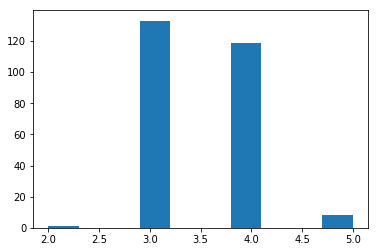

In [88]:
plt.hist(df_one_stock['range'])

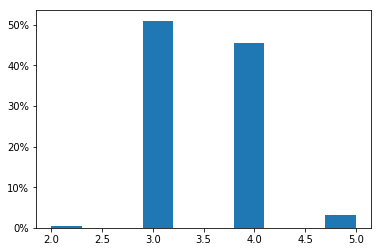

In [89]:
plt.hist(df_one_stock['range'], weights=np.ones(len(df_one_stock['range'])) / len(df_one_stock['range']))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()